# Matrix Multiplication

## $$ \text{Let } A \in \mathbb R ^{n \times l} \, , B \in \mathbb R ^{l \times m} \\ AB = \Big( \sum_{k=1} ^l a_{i,k} \, b_{k,j} \Big)^{n,m}$$

### $$ 
\begin{bmatrix}
a_{1,1} & a_{1,2} & a_{1,3}\\
\color{red}{a_{2,1}} & \color{red}{a_{2,2}} & \color{red}{a_{2,3}}\\
a_{3,1} & a_{3,2} & a_{3,3}
\end{bmatrix}
\begin{bmatrix}
\color{red}{b_{1,1}} & b_{1,2} & b_{1,3}\\
\color{red}{b_{2,1}} & b_{2,2} & b_{2,3}\\
\color{red}{b_{3,1}} & b_{3,2} & b_{3,3}
\end{bmatrix}
= 
\begin{bmatrix}
c_{1,1} & c_{1,2} & c_{1,3}\\
\color{red}{c_{2,1}} & c_{2,2} & c_{2,3}\\
c_{3,1} & c_{3,2} & c_{3,3}
\end{bmatrix}
$$
where 
### $$ \color{red}{c_{2,1}} = a_{2,1}b_{1,1} + a_{2,2}b_{2,1} + a_{2,3}b_{3,1}$$


Matrix multiplication can be seen as a linear transformation on basis function.

# Linear Transformations

### 1. Rotation __(when the matrix is orthonormal)__ :

Orthonormal (orthogonal) matrices are matrices in which the columns vectors form an orthonormal set (each column vector has length one and is orthogonal to all the other colum vectors)
 
### 2. Scaling __(when the matrix is diagonal)__
A diagonal matrix is a matrix in which the entries outside the main diagonal are all zero.

### 3. Reflection __(when the determinant is negative)__

### 4. Shearing

A shear matrix a matrix that represents the addition of a multiple of one row or column to another. Such a matrix may be derived by taking the identity matrix and replacing one of the zero elements with a non-zero value.


## 1. [Rotation](https://en.wikipedia.org/wiki/Rotation_matrix)

### $$ 
90 ° \text{rotation}=\begin{bmatrix}
0 & -1 \\
1 & 0\\
\end{bmatrix}, 180° \text{rotation}=\begin{bmatrix}
-1 & 0 \\
0 & -1\\
\end{bmatrix}, 270° \text{rotation}=\begin{bmatrix}
0 & 1 \\
-1 & 0\\
\end{bmatrix}
$$

In [1]:
import torch
w90=torch.FloatTensor([[0,-1],[1,0]])
print(f'90° rotation:\n{w90}')
print(f'180° rotation: \n{w90@w90}')
print(f'270° rotation: \n{w90@w90@w90}')

90° rotation:
tensor([[ 0., -1.],
        [ 1.,  0.]])
180° rotation: 
tensor([[-1.,  0.],
        [ 0., -1.]])
270° rotation: 
tensor([[ 0.,  1.],
        [-1.,  0.]])


In [2]:
import matplotlib.pyplot as plt
# Curtousy of one and only Alfredo Canziani! :)
def set_default(figsize=(10, 10), dpi=100):
    plt.style.use(['dark_background', 'bmh'])
    plt.rc('axes', facecolor='k')
    plt.rc('figure', facecolor='k')
    plt.rc('figure', figsize=figsize, dpi=dpi)

def show_scallter_plot(X,W=None,axs=None,title='Title',width=0.04,eigen=False,show_basis=False):
    if W is not None:
        Y=X@W
    else:
        Y=X
    axs.axis('equal')
    axs.scatter(Y[:, 0], Y[:, 1], c=X[:, 0], s=30)
    # plt.grid(True)
    if eigen and W is not None:
        U, S, V = torch.svd(W)
        # plot transformed points
        title=' y=Wx, singular val.:[{:.3f}, {:.3f}]'.format(S[0], S[1])

    axs.set_title(title)
    axs.axis('off')
    bases = torch.cat((torch.zeros(2, 2), torch.eye(2)))
    bases[2:] -= bases[:2]
    axs.arrow(*bases[0], *bases[2], width=width, color=(1,0,0), zorder=10, alpha=1., length_includes_head=True)
    axs.arrow(*bases[1], *bases[3], width=width, color=(0,1,0), zorder=10, alpha=1., length_includes_head=True)
set_default()    

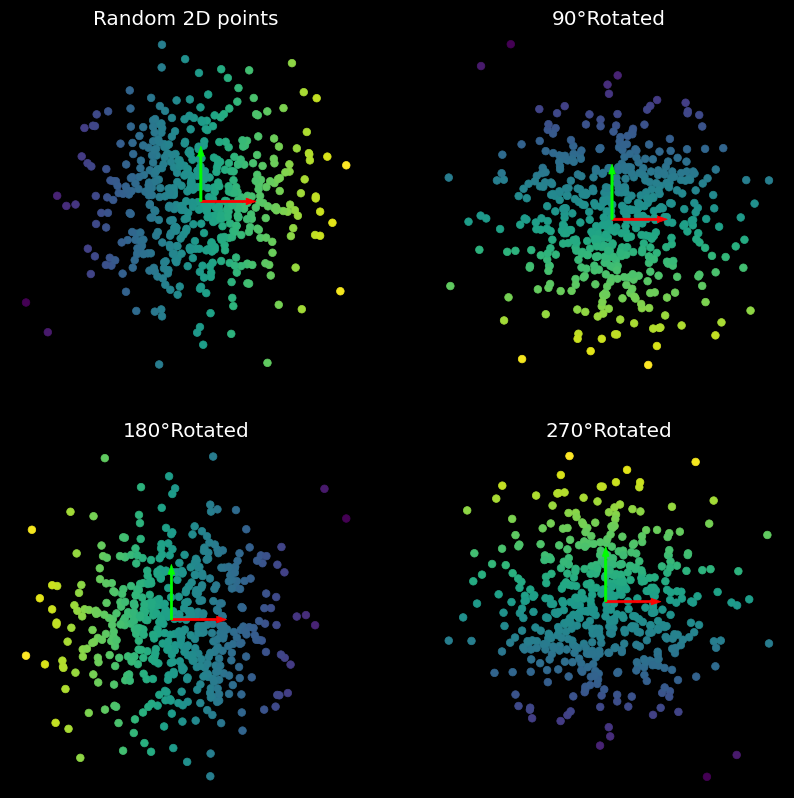

In [3]:
N=500
X = torch.randn(N, 2)
fig, axes = plt.subplots(2, 2)
axes=axes.flatten()
show_scallter_plot(X,None,axes[0],title='Random 2D points')
show_scallter_plot(X,w90,axes[1],title='90°Rotated')
show_scallter_plot(X,w90@w90,axes[2],title='180°Rotated')
show_scallter_plot(X,w90@w90@w90,axes[3],title='270°Rotated')
plt.plot()
plt.show()

## 2. Scaling/Squeezing/Stretching

## $$ 
\begin{bmatrix}
a & 0 \\
0 & b\\
\end{bmatrix}
$$

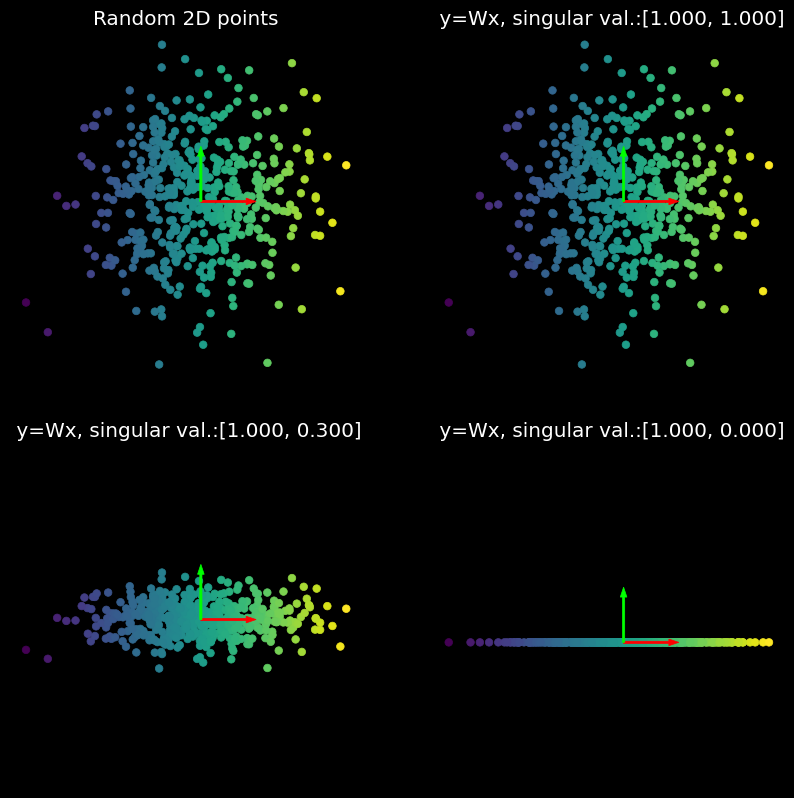

In [4]:
fig, axes = plt.subplots(2, 2)
axes=axes.flatten()
show_scallter_plot(X,None,axes[0],title='Random 2D points')

W=torch.FloatTensor([[1,0],
                     [0,1]])

show_scallter_plot(X,W,axes[1],eigen=True)
show_scallter_plot(X,torch.FloatTensor([[1,0],[0,.3]]),axes[2],eigen=True)
show_scallter_plot(X,torch.FloatTensor([[1,0],[0,0]]),axes[3],eigen=True)

plt.plot()
plt.show()

## 3. Reflection

## $$ 
\begin{bmatrix}
a & b \\
c & d\\
\end{bmatrix} \text{ if } ad-bc < 0 \textbf{ when the determinant is negative}
$$



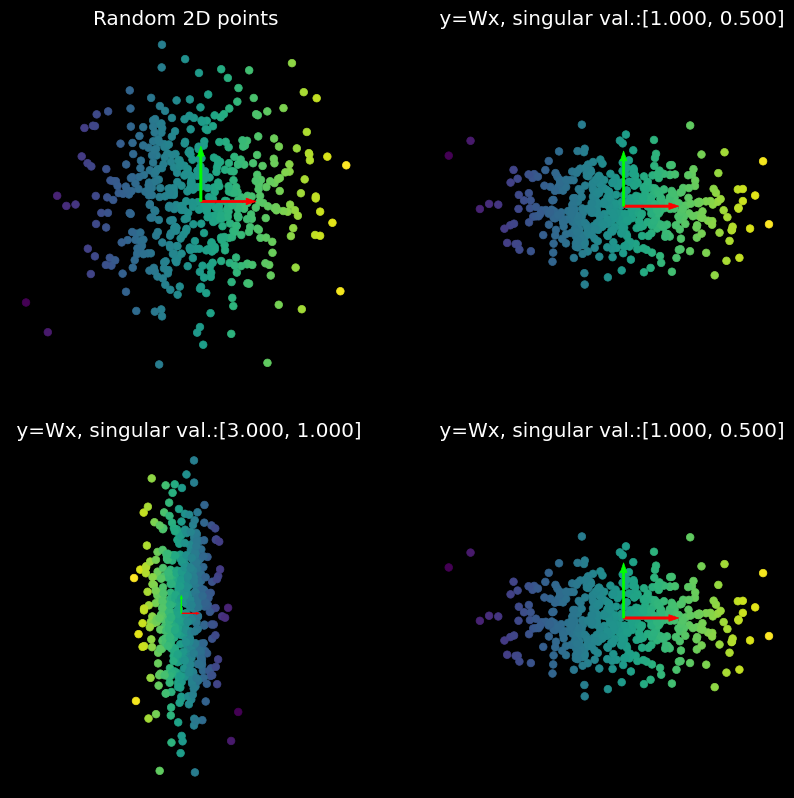

In [5]:
fig, axes = plt.subplots(2, 2)
axes=axes.flatten()
show_scallter_plot(X,None,axes[0],title='Random 2D points')

W=torch.FloatTensor([[1,0],
                     [0,1]])

show_scallter_plot(X,torch.FloatTensor([[1,0],
                                        [0,-.5]]),axes[1],
                   eigen=True)

show_scallter_plot(X,torch.FloatTensor([[-1,0],
                                        [0,3]]),axes[2],
                   eigen=True)


show_scallter_plot(X,torch.FloatTensor([[1,0],
                                        [0,-.5]]),axes[3],
                   eigen=True)

plt.plot()
plt.show()

## 4. [Shear Matrix](https://en.wikipedia.org/wiki/Shear_matrix)

## $$\begin{bmatrix}
1 & \lambda \\
0 & 1\\
\end{bmatrix}
$$

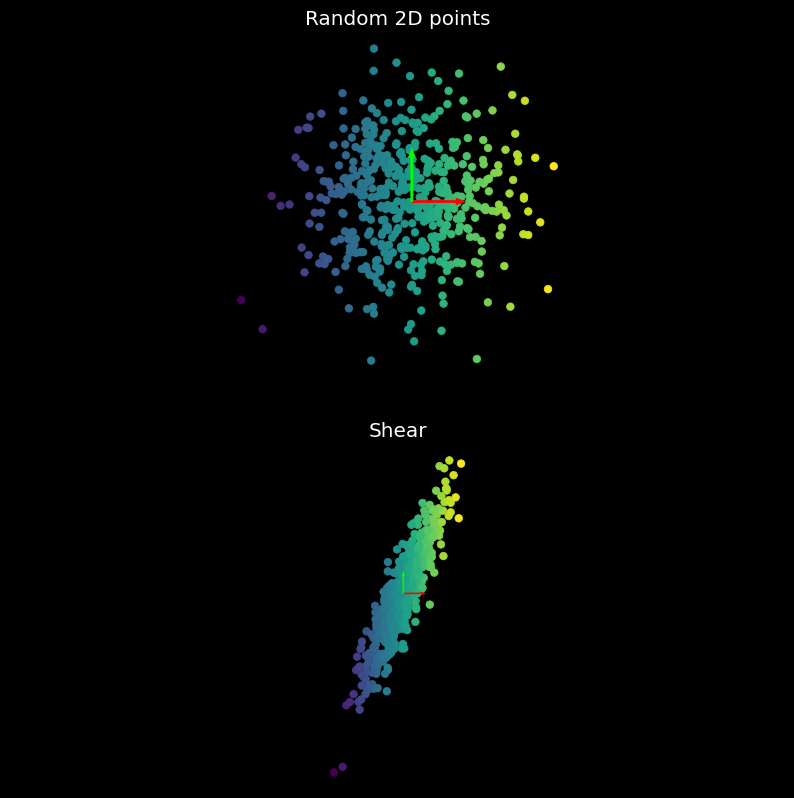

In [6]:
fig, axes = plt.subplots(2)
axes=axes.flatten()
W=torch.FloatTensor([[1,2],
                     [0,1]])
show_scallter_plot(X,None,axes[0],title='Random 2D points')
show_scallter_plot(X,W,axes[1],title='Shear')
plt.plot()
plt.show()

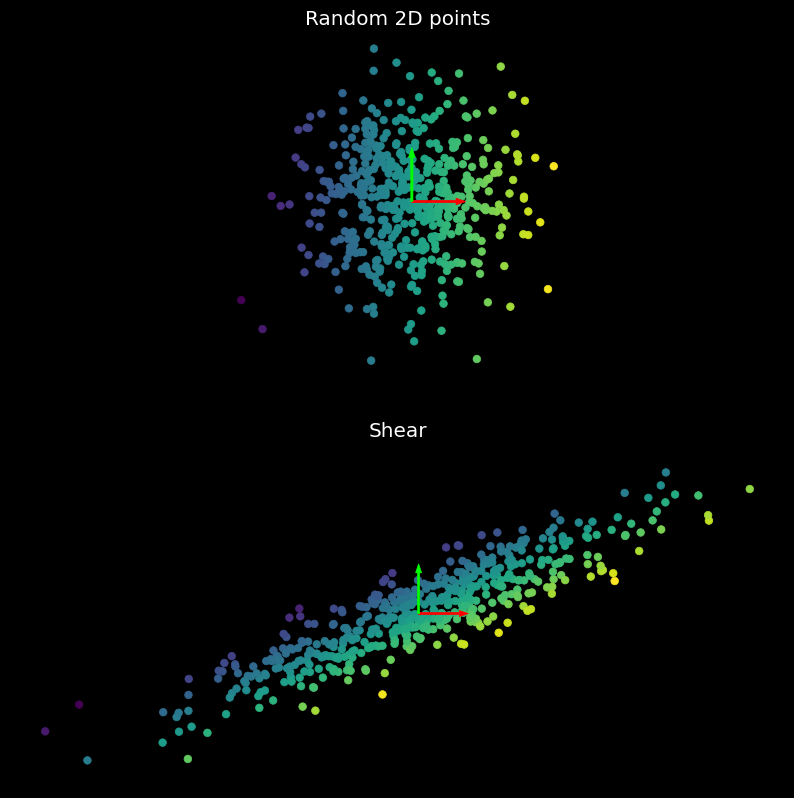

In [7]:
fig, axes = plt.subplots(2)
axes=axes.flatten()
W=torch.FloatTensor([[1,0],
                     [2,1]])
show_scallter_plot(X,None,axes[0],title='Random 2D points')
show_scallter_plot(X,W,axes[1],title='Shear')
plt.plot()
plt.show()

# Non-linear transformations

+ Linear transformation can rotate, reflect, strecth, and compress but cannot curve

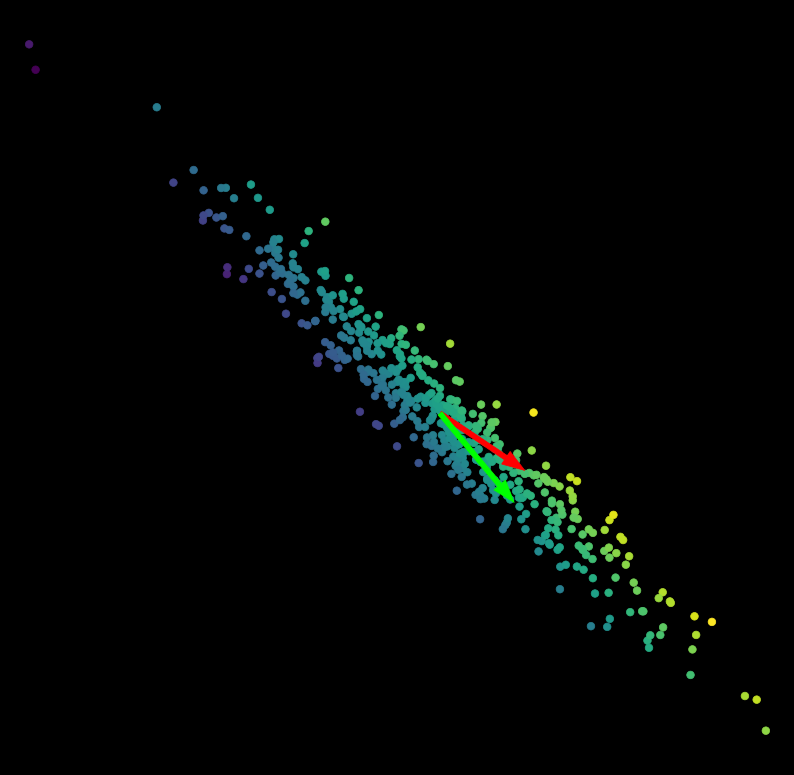

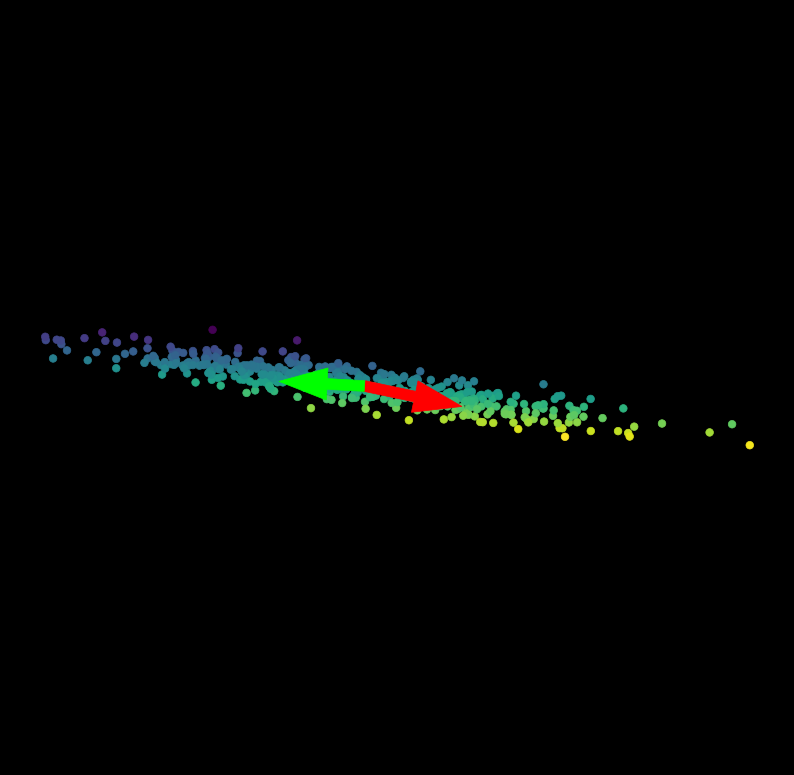

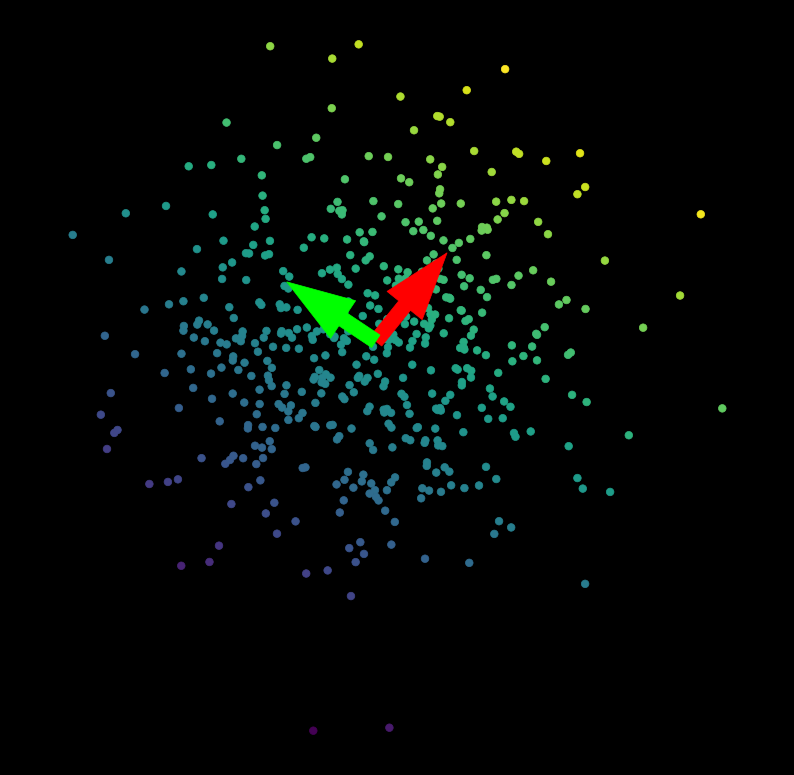

In [8]:
# Curtousy of one and only Alfredo Canziani! :)
from res.plot_lib import show_scatterplot,plot_bases
from torch import nn

colors=X[:, 0]

for _ in range(3):
    model=nn.Sequential(nn.Linear(2,2,bias=False))
    with torch.no_grad():
        Y = model(X)
        show_scatterplot(Y,colors)
        plot_bases(model(torch.cat((torch.zeros(2, 2), torch.eye(2)))))

In [9]:
from res.plot_lib import set_default, show_scatterplot, plot_bases
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, title, axis


$$ f(x) = tanh \big(  
\begin{bmatrix}
s & 0 \\
0 & s\\
\end{bmatrix} x \big )
$$ 

Text(0.5, 1.0, 'tanh() non linearity')

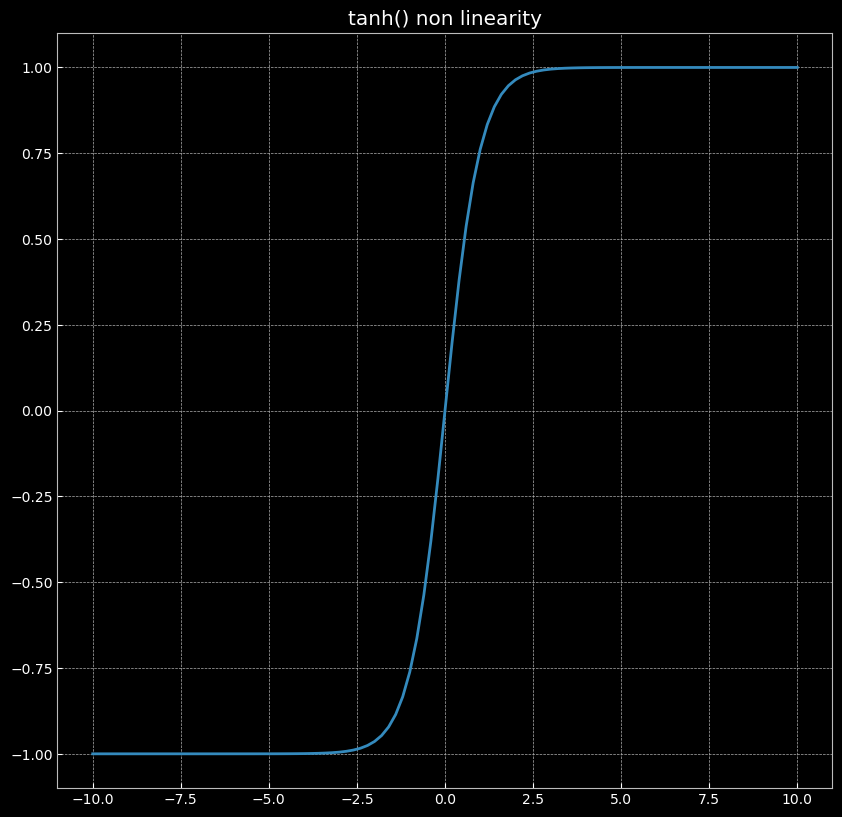

In [10]:
z = torch.linspace(-10,10,101)
s = torch.tanh(z)
plot(z.numpy(),s.numpy())
title('tanh() non linearity')

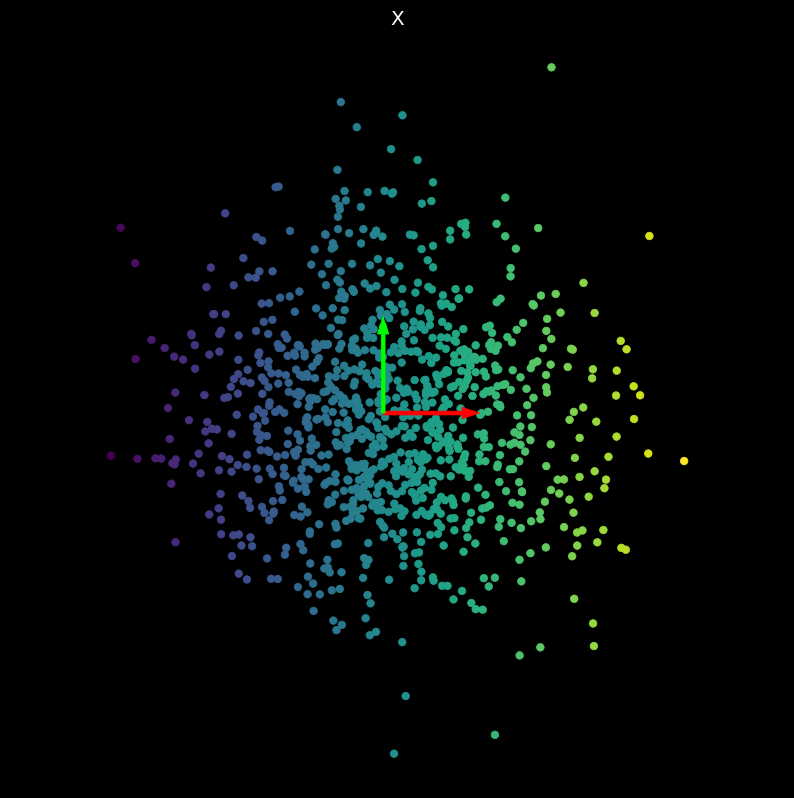

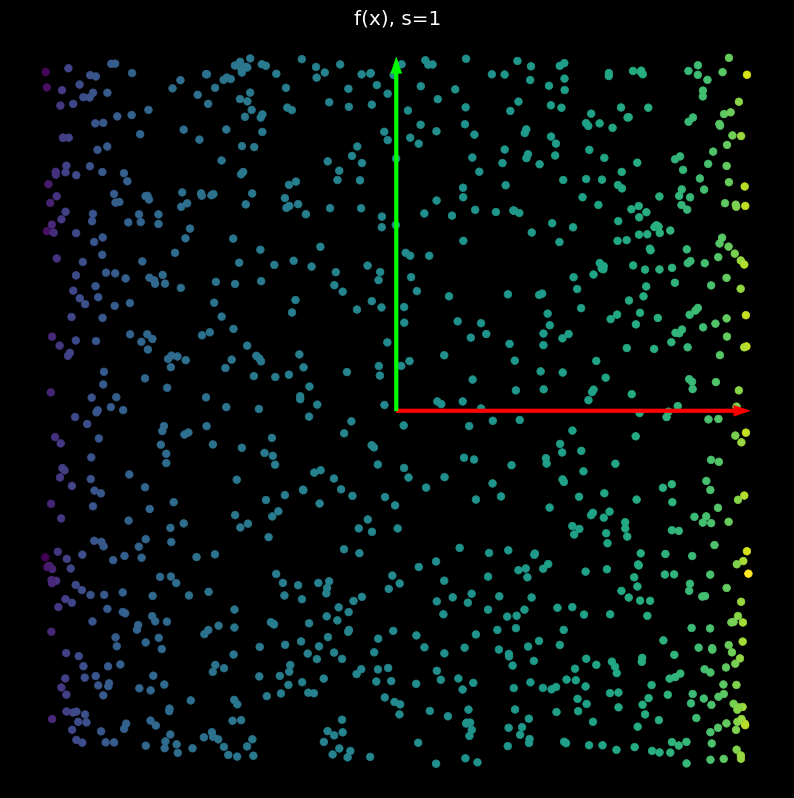

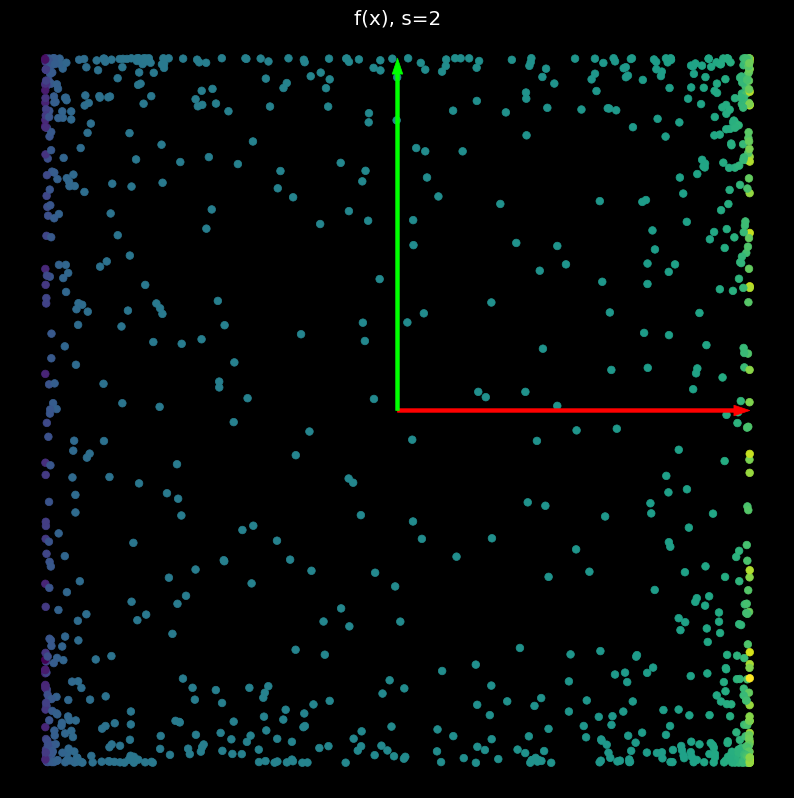

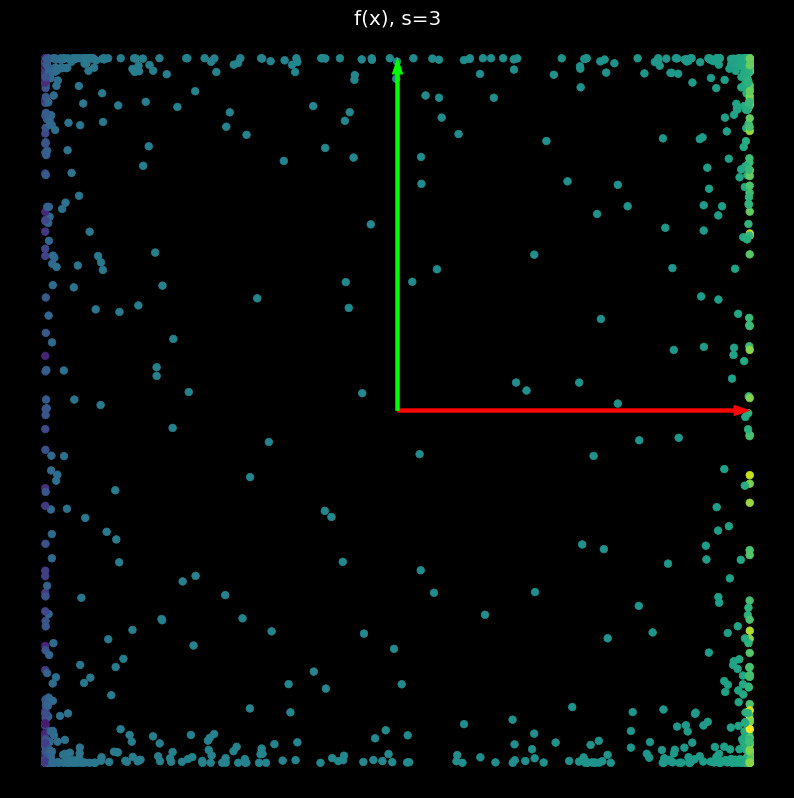

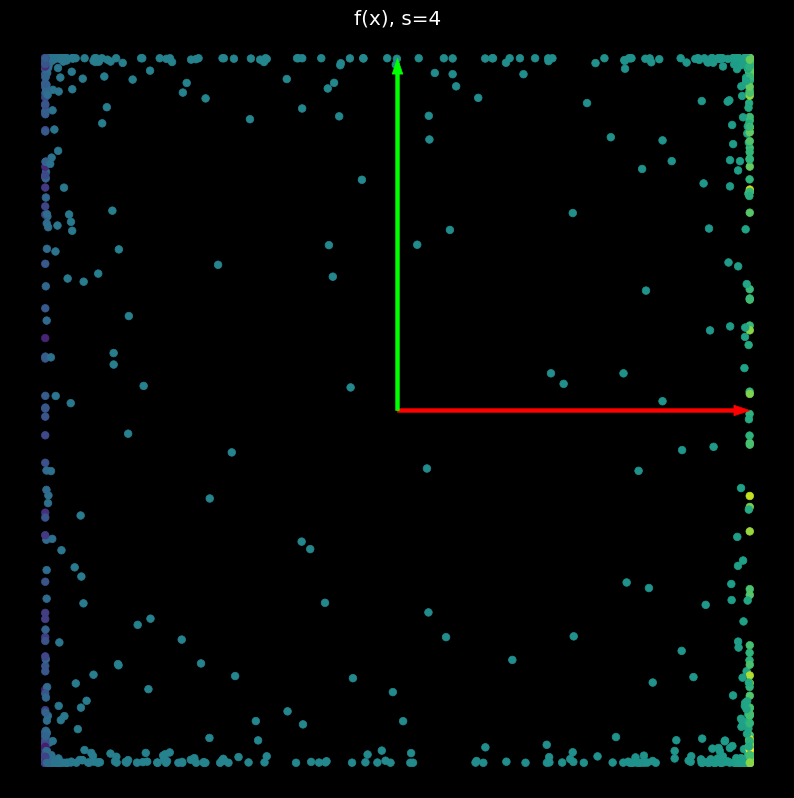

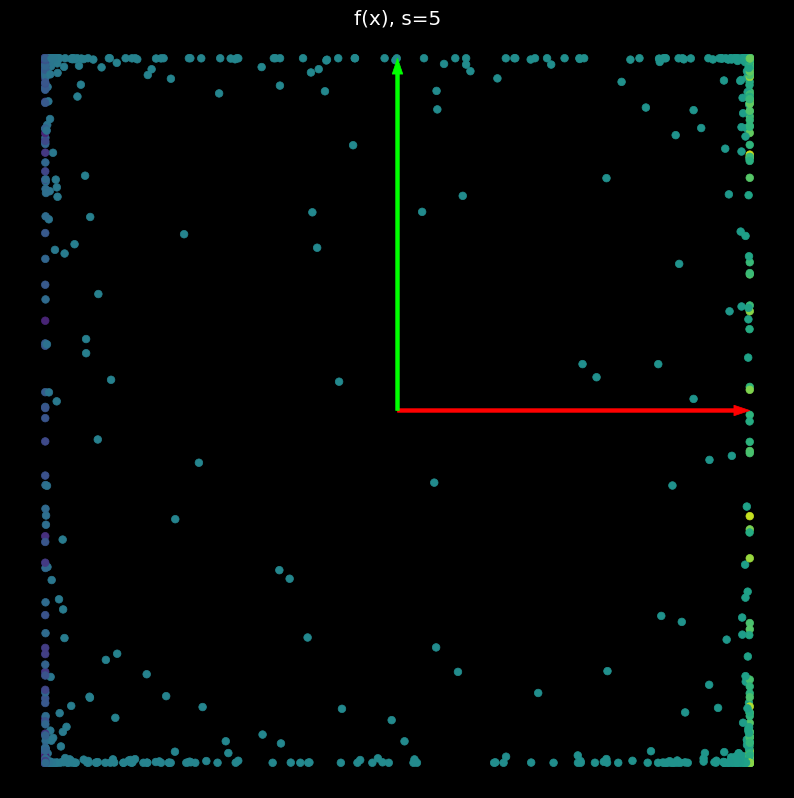

In [11]:

# Set style (needs to be in a new cell)
set_default()

# generate some points in 2-D space
n_points = 1000
X = torch.randn(n_points, 2)  # N(0,1)
colors = X[:, 0]
show_scatterplot(X, colors, title='X')
OI = torch.cat((torch.zeros(2, 2), torch.eye(2)))
plot_bases(OI)
plt.show()
model = nn.Sequential(
        nn.Linear(2, 2, bias=False),
        nn.Tanh())
for s in range(1, 6):
    W = s * torch.eye(2)
    model[0].weight.data.copy_(W)
    Y = model(X).data
    show_scatterplot(Y, colors, title=f'f(x), s={s}')
    plot_bases(OI, width=0.01)
    plt.show()

# Neural Networks = Sequence of Non-linear Transformations


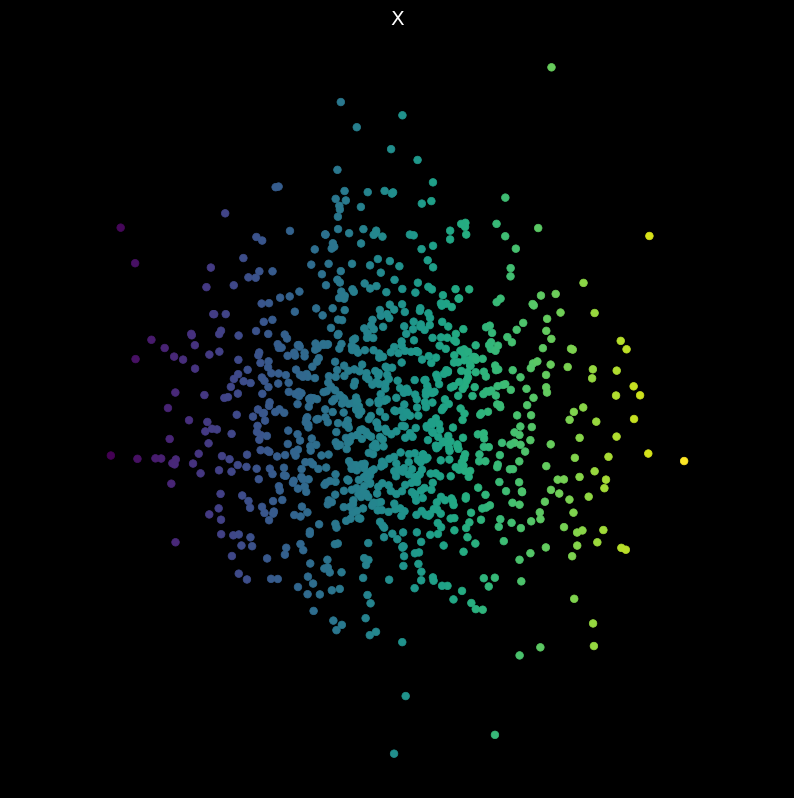

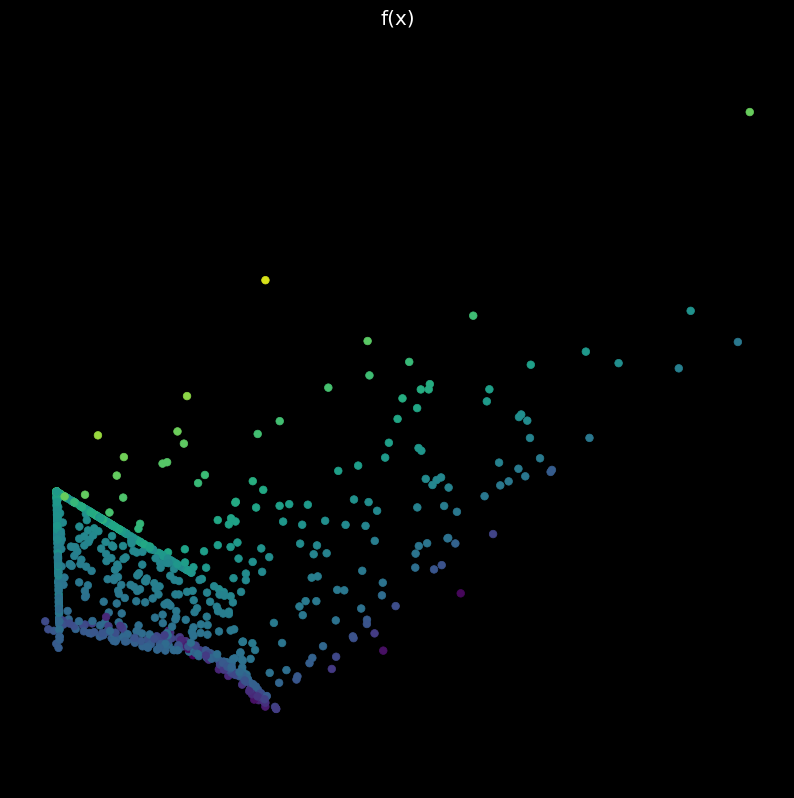

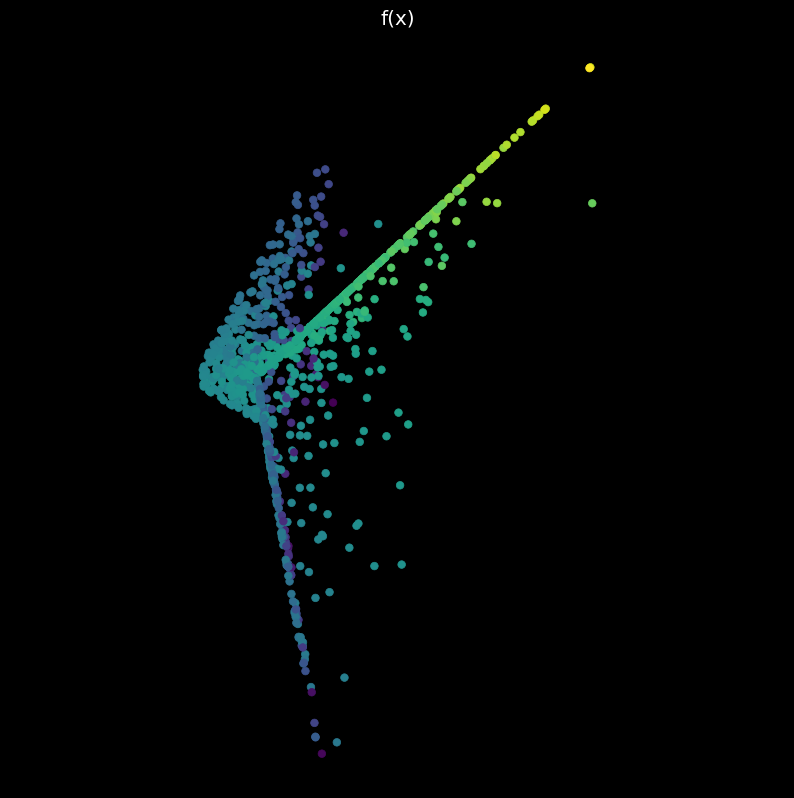

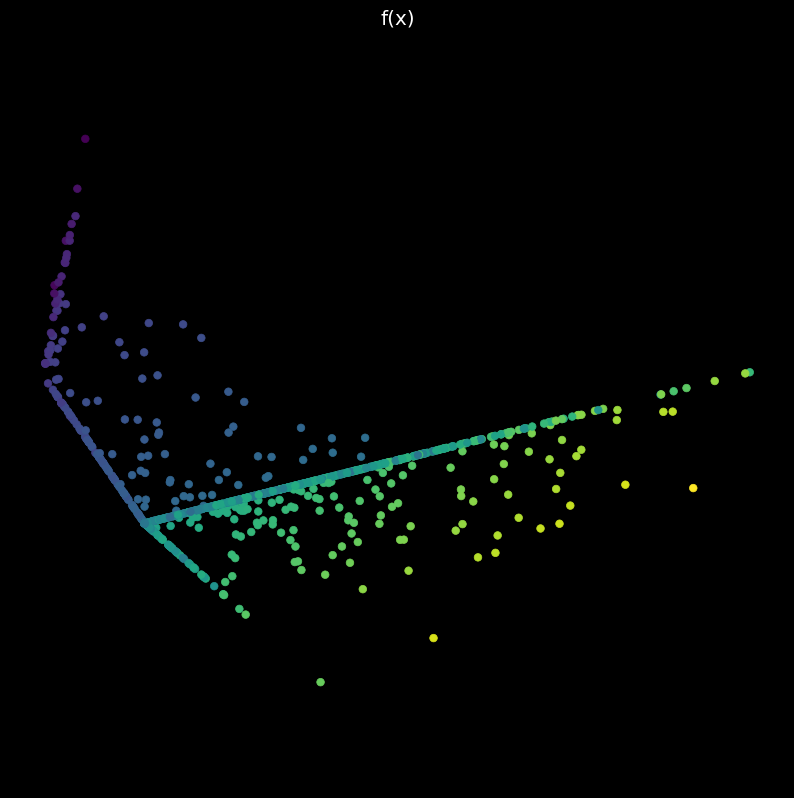

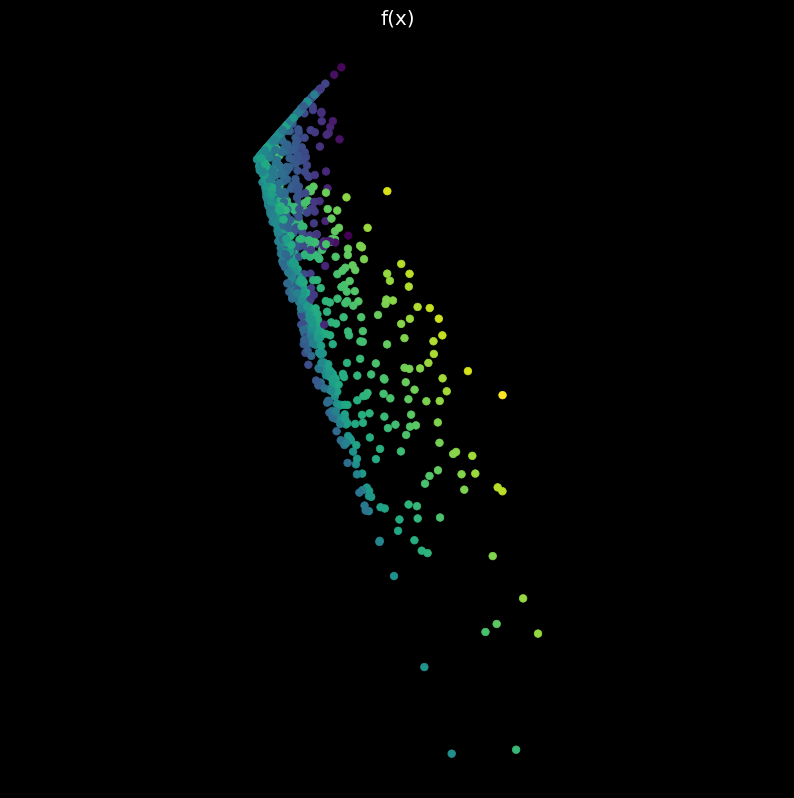

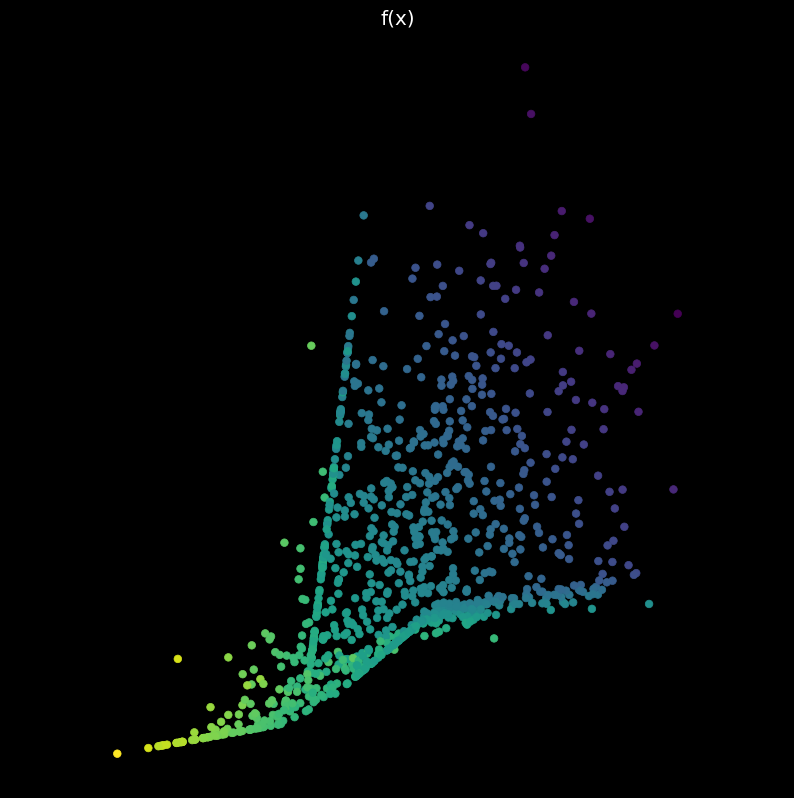

In [12]:
show_scatterplot(X, colors, title='X')

n_hidden= 5
NL=nn.ReLU()

models = []

for i in range(5):
    # create 1-layer nn
    model=nn.Sequential(
    nn.Linear(2, n_hidden),
        NL,
        nn.Linear(n_hidden,2))
    models.append(model)

    
    
    with torch.no_grad():
        Y= model(X)
    
    show_scatterplot(Y, colors, title=f'f(x)')
    plt.show()